In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.9.0'

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'Data/Images/train/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
val_set = test_datagen.flow_from_directory(
        'Data/Images/val/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [19]:
cnn=tf.keras.models.Sequential()

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', input_shape=[64,64,3]))

In [21]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [23]:
cnn.add(tf.keras.layers.Flatten())

In [24]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [25]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [26]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [28]:
cnn.fit(x= training_set, validation_data=val_set, epochs=5)

Epoch 1/5
125/125 [==============================] - 100s 790ms/step - loss: 0.3229 - accuracy: 0.8590 - val_loss: 0.2406 - val_accuracy: 0.9473
Epoch 2/5
125/125 [==============================] - 19s 148ms/step - loss: 0.1273 - accuracy: 0.9617 - val_loss: 0.1150 - val_accuracy: 0.9732
Epoch 3/5
125/125 [==============================] - 19s 150ms/step - loss: 0.0782 - accuracy: 0.9745 - val_loss: 0.0810 - val_accuracy: 0.9849
Epoch 4/5
125/125 [==============================] - 19s 156ms/step - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 5/5
125/125 [==============================] - 19s 153ms/step - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0513 - val_accuracy: 0.9860


1/1 [==============================] - 0s 38ms/step
negative ==> (not cracked)


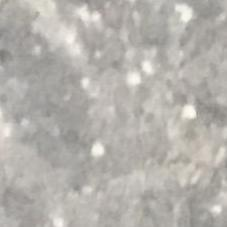

In [43]:
from IPython import display

import numpy as np
from keras.preprocessing import image
loc='Data/Images/trainqqq/Negative/00010.jpg'
test_image = tf.keras.utils.load_img(loc, target_size=(64, 64))
display.Image(test_image)
test_image=tf.keras.utils.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=cnn.predict(test_image)

training_set.class_indices
if result[0][0]==1:
    prediction='positive ==> (cracked)'
else:
        prediction='negative ==> (not cracked)'
print(prediction)

display.Image(loc)